# 종합실습3 이변량분석(y-범주) : 직원 이직 분석

![](https://www.talentalign.com/wp-content/uploads/2019/09/main-qimg-2434943004743f79c0abf540cb4f6e2c-cropped.jpg)

* 직원 이직 분석
    * 회사에서 최근 1~2년 사이 이직률이 상승하였습니다.
    * 여러분은, 직원들이 이직하는데 중요한 요인이 무엇인지 데이터를 기반으로 한 분석을 의뢰 받았습니다.

# 1.환경준비

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.

In [2]:
# 직원 이직 데이터
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_simple3.csv'
data = pd.read_csv(path)
data.head()

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,27,2,1898,Female,3,Single,6500,No,14,9
1,0,27,9,1965,Male,4,Single,4105,No,14,7
2,0,44,2,1703,Female,4,Married,7879,Yes,19,9
3,0,42,2,1231,Male,1,Married,6272,No,16,10
4,0,32,1,2016,Female,4,Married,10422,No,19,14


> * 변수설명
    * Attrition	:	이직여부, Yes , No (Target)
    * Age	:	나이
    * DistanceFromHome	:	집-직장 거리(마일)
    * EmployeeNumber	:	사번
    * Gender	:	성별(Male, Female)
    * JobSatisfaction	:	직무 만족도, 다음시트 참조
    * MaritalStatus	:	결혼상태(Married, Single, Divorced)
    * MonthlyIncome	:	월급(달러)
    * OverTime	:	야근여부
    * PercentSalaryHike	:	전년대비 급여인상율(%)
    * TotalWorkingYears	:	총 근무 연수



In [28]:
data['Attrition'].value_counts(normalize=True)

0    0.675
1    0.325
Name: Attrition, dtype: float64

# 2.범주-->범주

In [3]:
target = 'Attrition'

## (1) Gender --> Attrition

In [4]:
feature = 'Gender'

* 교차표

In [5]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(data[target], data[feature])

Gender,Female,Male
Attrition,,
0,157,248
1,66,129


In [6]:
pd.crosstab(data[target], data[feature], normalize = 'columns')

Gender,Female,Male
Attrition,,
0,0.704036,0.657825
1,0.295964,0.342175


* 시각화

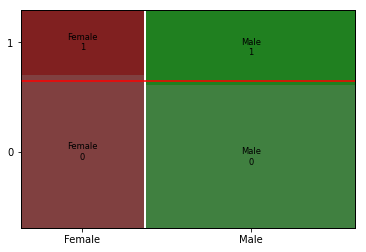

In [7]:
mosaic(data, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [8]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
# print('기대빈도\n',result[3])

교차표
 Gender     Female  Male
Attrition              
0             157   248
1              66   129
----------------------------------------------------------------------------------------------------
카이제곱통계량 1.1614318259891623
p-value 0.28116879016055174
자유도 1


* 파악된 내용을 기술해 봅시다.

In [9]:
# 카이제곱검정으로는 관련이 없다고 나오나, 그래프로 볼때 약간 관련이 있다고 판단됨.

## (2) JobSatisfaction --> Attrition

In [38]:
feature = 'JobSatisfaction'

* 교차표

In [39]:
table = pd.crosstab(data[target], data[feature])
table

JobSatisfaction,1,2,3,4
Attrition,,,,
0,74,79,114,138
1,52,37,59,47


In [40]:
pd.crosstab(data[target], data[feature], normalize='columns')

JobSatisfaction,1,2,3,4
Attrition,,,,
0,0.587302,0.681034,0.65896,0.745946
1,0.412698,0.318966,0.34104,0.254054


* 시각화

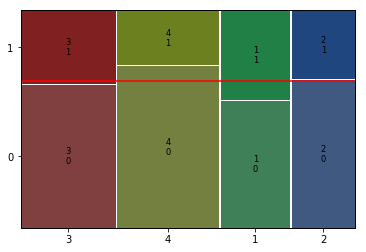

In [42]:
mosaic(data, [feature, target])
plt.axhline(1-data[target].mean(), color='r')
plt.show()

In [19]:
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])

카이제곱통계량 8.884191097554549
p-value 0.03087092125625072
자유도 3


* 파악된 내용을 기술해 봅시다.

In [ ]:
# 귀무가설 기각 -> 직업만족도에 따라 이직율은 관련이 있다.

## (3) MaritalStatus --> Attrition

In [20]:
feature = 'MaritalStatus'

* 교차표

In [21]:
table = pd.crosstab(data[target], data[feature])

In [22]:
table

MaritalStatus,Divorced,Married,Single
Attrition,,,
0,89,205,111
1,23,69,103


* 시각화

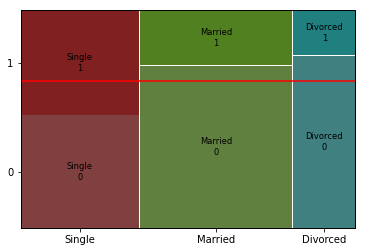

In [24]:
mosaic(data, [feature, target])
plt.axhline(1-data[target].mean(), color='r')
plt.show()

* 수치화 : 카이제곱검정

In [29]:
result = spst.chi2_contingency(table)
print('카이제곱 통계량:', result[0])
print('p-value:', result[1])
print('자유도:', result[2])

카이제곱 통계량: 37.829711907070525
p-value: 6.100738829354226e-09
자유도: 2


* 파악된 내용을 기술해 봅시다.

In [ ]:
# 결혼 여부와 이직율은 관련이 있다(차이가 있다). 그러나 거의 없다.

## (4) OverTime --> Attrition

In [30]:
feature = 'OverTime'

* 교차표

In [32]:
table = pd.crosstab(data[target], data[feature])

In [33]:
table

OverTime,No,Yes
Attrition,,
0,315,90
1,90,105


* 시각화

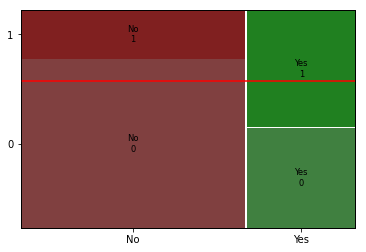

In [36]:
mosaic(data, [feature, target])
plt.axhline(1-data[target].mean(), color='r')
plt.show()

* 수치화 : 카이제곱검정

In [37]:
result = spst.chi2_contingency(table)
print('카이제곱 통계량:', result[0])
print('p-value:', result[1])
print('자유도:', result[2])

카이제곱 통계량: 58.57149427899665
p-value: 1.9603625783060702e-14
자유도: 1


* 파악된 내용을 기술해 봅시다.

In [ ]:
# 야근 여부와 이직률에는 관계가 있다.

# 3.숫자-->범주

## (1) Age --> Attrition

In [74]:
feature = 'Age'

In [75]:
def eda_2_nc(data, feature, target):
    plt.figure(figsize = (5, 8))
    plt.subplot(3,1,1)
    sns.kdeplot(x=feature, data = data, hue ='Attrition', common_norm = False)
    plt.grid()

    plt.subplot(3,1,2)
    sns.kdeplot(x=feature, data = data, hue ='Attrition', multiple = 'fill')
    plt.axhline(data['Attrition'].mean(), color = 'r')
    plt.grid()

    plt.subplot(3,1,3)
    sns.histplot(x=feature, data = data, bins = 20, hue ='Attrition', multiple = 'fill')
    plt.axhline(data['Attrition'].mean(), color = 'r')
    plt.grid()

    plt.tight_layout()
    plt.show()

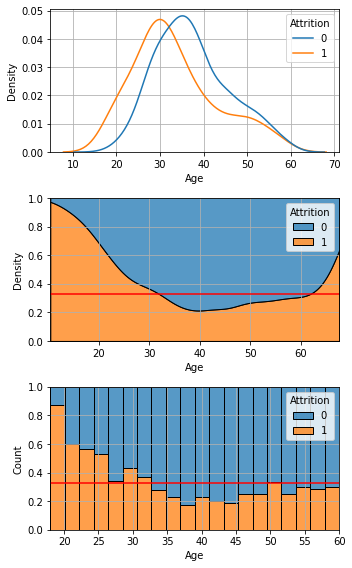

In [76]:
eda_2_nc(data, feature, target)

* 파악된 내용을 기술해 봅시다.

In [78]:
#나이와 이직여부는 관련이 있다. 30대 초반까지 사람들이 전체 평균보다 이직률이 높다.(젊을수록 많이, 나이 많을 수록 적게)

## (2) DistanceFromHome --> Attrition

In [79]:
feature = 'DistanceFromHome'

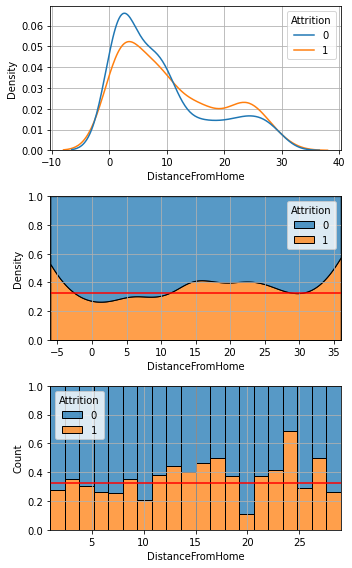

In [80]:
eda_2_nc(data, feature, target)

* 파악된 내용을 기술해 봅시다.

In [81]:
#거리가 가까운 사람보다 거리가 먼 사람이 (전체 평균보다) 이직률이 더 높다.

## (3) MonthlyIncome --> Attrition

In [82]:
feature = 'MonthlyIncome'

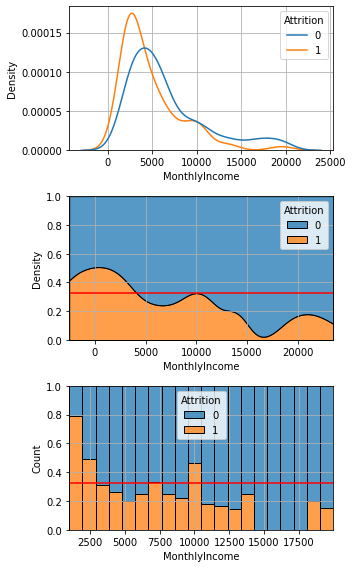

In [83]:
eda_2_nc(data, feature, target)

* 파악된 내용을 기술해 봅시다.

In [ ]:
#급여가 높은 사람보다 급여가 낮은 사람이 (전체 평균보다) 이직률이 더 높다.

## (4) PercentSalaryHike --> Attrition

In [88]:
feature = 'PercentSalaryHike'

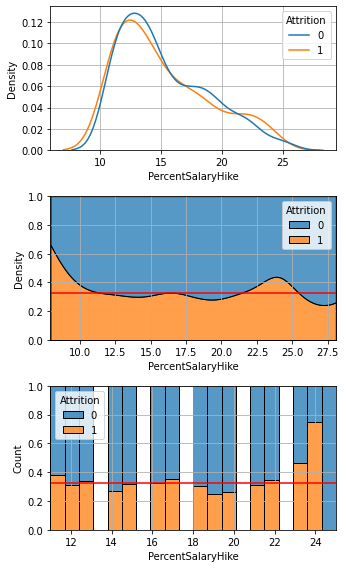

In [89]:
eda_2_nc(data, feature, target)

* 파악된 내용을 기술해 봅시다.

In [ ]:
#PercentSalaryHike는 이직률에 차이가 없다.

## (5) TotalWorkingYears --> Attrition

In [85]:
feature = 'TotalWorkingYears'

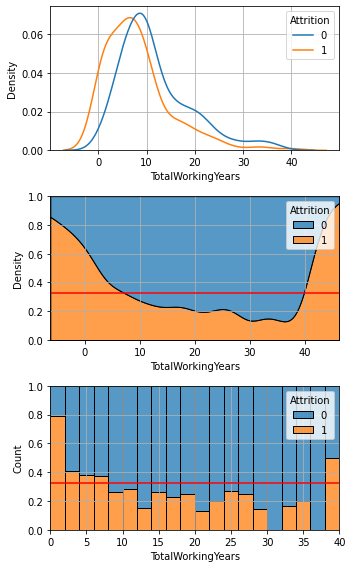

In [86]:
eda_2_nc(data, feature, target)

* 파악된 내용을 기술해 봅시다.

In [87]:
#근무년수가 길수록 이직률이 낮다.

# 4.관계 정리하기

① 강한관계

In [ ]:
MoritalStatus, OverTime, Age, TotalWorkingYears, MonthlyIncome

② 중간관계

In [ ]:
JobDatistaction, DistanceFromHome, PercentSalaryHike

③ 관계없음(약한 관계)

In [ ]:
Gender